In [57]:
import numpy as np

w = np.matrix([[1,2],[3,4],[5,6]])#np.random.rand(3,2)

i = np.array([1,2])#np.matrix(1,2)#np.random.rand(2)

r = w.dot(i)

print(w)
print(i)

print(r)



[[1 2]
 [3 4]
 [5 6]]
[1 2]
[[ 5 11 17]]


0.9999546021312976


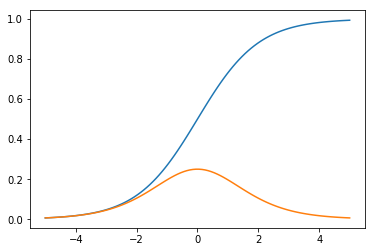

In [971]:
import matplotlib.pyplot as plt
import math

def sigmoid(x):
    return 1 / (1 + math.e**-x)

def dsigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

print(sigmoid(10))

x = np.linspace(-5,5,100)
plt.plot(x, sigmoid(x))
plt.plot(x, dsigmoid(x))
plt.show()

0,0:  [[ 0.13646111]]
0,1:  [[ 0.67204924]]
1,0:  [[ 0.6822199]]
1,1:  [[ 0.25087345]]


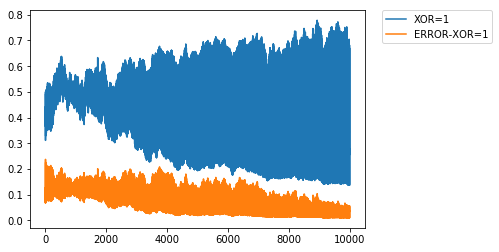

In [1105]:
import random


class Layer:
    
    # constructor of this layer with n-neurons
    # n = number of neurons in this layer
    # inputs = number of neurons from layer before
    
    def __init__(self, layerType, neurons, inputs):
        
        # I = INPUT; H = HIDDEN; O = OUTPUT;
        
        self.layerType = layerType
        self.neurons = neurons
        if layerType == "I":
            self.weights = np.eye(neurons)
        else:
            self.weights = np.random.normal(0,1,(inputs,neurons)) #np.random.rand(neurons,inputs)
        self.state = 0
        self.x = 0
    
    def forward(self, input):
        
        #print("Gewichte: ",self.weights)
        #print("Inputs: ", input)
        
        # if input layer set output = input
        if self.layerType == "I":

            self.x = input.dot(self.weights)
            self.state = input.dot(self.weights)
        
        # else use weights and activation function
        else:
            self.x = input.dot(self.weights)
            self.state = sigmoid(input.dot(self.weights))
    
    def error(self, target):
        error = np.sum((target - self.getY())**2) / 2
        return error
    
    def setWeights(self, new_weights):
        self.weights = new_weights
        
    def getX(self):
        return self.x
    
    def getY(self):
        return self.state  
    
    def getWeights(self):
        return self.weights
    
    # return quantity of neurons
    def getNeuronCount(self):
        return self.neurons
    
    
l1 = Layer("I",2,2)
l2 = Layer("H",3,l1.getNeuronCount())
l3 = Layer("O",1,l2.getNeuronCount())

factor = 0.2

r1 = []
r2 = []
r3 = []
r4 = []
r5 = []
r6 = []

delta_k = 0

data = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]])


for c in range(10000):

    #training = data[1]
    training = random.choice (data)

    l1.forward(np.array([[training[0],training[1]]]))
    l2.forward(l1.getY())
    l3.forward(l2.getY())

    target = np.array([[training[2]]])
    
    r1.append(l3.getY()[0])
    r3.append(l3.error(target))
    
    #l3_weights = l3.getWeights()
    l3_error = target - l3.getY()
    l3_delta = l3_error * dsigmoid(l3.getX())
    
    l2_error = l3_delta.dot(l3.getWeights().T)
    l2_delta = l2_error * dsigmoid(l2.getX())
    
    new_weight_23 = l3.getWeights() + (l2.getY().T.dot(l3_delta)*factor)
    new_weight_12 = l2.getWeights() + (l1.getY().T.dot(l2_delta)*factor)
    
    l3.setWeights(new_weight_23)
    l2.setWeights(new_weight_12)

l1.forward(np.array([[0,0]]))
l2.forward(l1.getY())
l3.forward(l2.getY())

print("0,0: ",l3.getY())

l1.forward(np.array([[0,1]]))
l2.forward(l1.getY())
l3.forward(l2.getY())

print("0,1: ",l3.getY())

l1.forward(np.array([[1,0]]))
l2.forward(l1.getY())
l3.forward(l2.getY())

print("1,0: ",l3.getY())

l1.forward(np.array([[1,1]]))
l2.forward(l1.getY())
l3.forward(l2.getY())

print("1,1: ",l3.getY())

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(r1, label="XOR=1")
plt.plot(r3, label="ERROR-XOR=1")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [1087]:
a = np.array([[1,0,3],[0,1,3],[1,0,3],[0,1,3],[1,0,3],[0,1,3]])
b = np.array([[0,1,3]])

c = a.dot(b)
print(a)
print(b)
print(c)

a = np.array([1,2])
b = np.array([1])

c = a / b
print(a)
print(b)
print(c)


ValueError: shapes (6,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

In [ ]:
 

    #print("Y: ",l2.getY().transpose())
    
    #print("Wert: ",delta3 * l2.getY().transpose())
    #print("Wert: ",l3.getWeights() + (delta3 / l2.getY()))
    #l3.setWeights(l3.getWeights() + (delta3 / l2.getY()))
    
    #for i in range(l3_weights.shape[0]):
    #    for j in range(l3_weights.shape[1]):
    #        print("Wert: ",l2.getY())
    #        l3.getWeights()[i][j] -= factor * delta2[j] * l3.getState()[i]
     
    #l2_weights = l2.getWeights()
    #
    #for i in range(l2_weights.shape[0]):
    #    for j in range(l2_weights.shape[1]):
    #        l2.getWeights()[i][j] -= factor * delta1[j] * l2.getState()[i]
            

In [457]:
v1 = np.array([9,6,3])
v2 = np.array([1,0.5])

def div(v1, v2):
    m = np.empty([v1.size, v2.size])
    for idx, i in enumerate(v2):
        for idy, j in enumerate(v1):
            m[idy][idx] = j / i
    return m
        
m = div(v1,v2)
print(m)

[[  9.  18.]
 [  6.  12.]
 [  3.   6.]]


In [ ]:
    #------------------------------
    
    l1.forward(np.array([1,1]))
    l2.forward(l1.getState())
    l3.forward(l2.getState())

    target = np.array([0])

    r2.append(l3.getState())
    r4.append(l3.error(target))
    
    delta3 = l3.backward(target)
    delta2 = l2.backward(target,delta3,l3.getWeights())
    delta1 = l1.backward(target,delta2,l2.getWeights())
    
    l3_weights = l3.getWeights()
        
    for i in range(l3_weights.shape[0]):
        for j in range(l3_weights.shape[1]):
            l3.getWeights()[i][j] -= factor * delta2[j] * l3.getState()[i]
     
    l2_weights = l2.getWeights()
    
    for i in range(l2_weights.shape[0]):
        for j in range(l2_weights.shape[1]):
            l2.getWeights()[i][j] -= factor * delta1[j] * l2.getState()[i]

In [1092]:
a = np.random.normal(0.5,0.5,(6,3))
b = np.random.normal(0.5,0.5,(3,1))
print()

print(a.dot(b))



[[ 1.42077697]
 [ 1.19143254]
 [ 1.62226339]
 [ 1.03199262]
 [ 1.07974167]
 [ 2.43558162]]


In [939]:
v1 = np.array([10])
v2 = np.array([[1,2]])

v3 = v1.dot(v2)

print(v3)

[10 20]
